# Dat121 project


### Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import scipy.stats
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


### Loading dataset

In [9]:
# Loading dataset
data = pd.read_csv('heart.csv', low_memory=False)

# copy of data
raw_df = data.copy()

# Defining input data and the target values
X = raw_df.drop(columns=[raw_df.columns[-1]])  
y =  raw_df[raw_df.columns[-1]] 


### Raw data exploration

              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

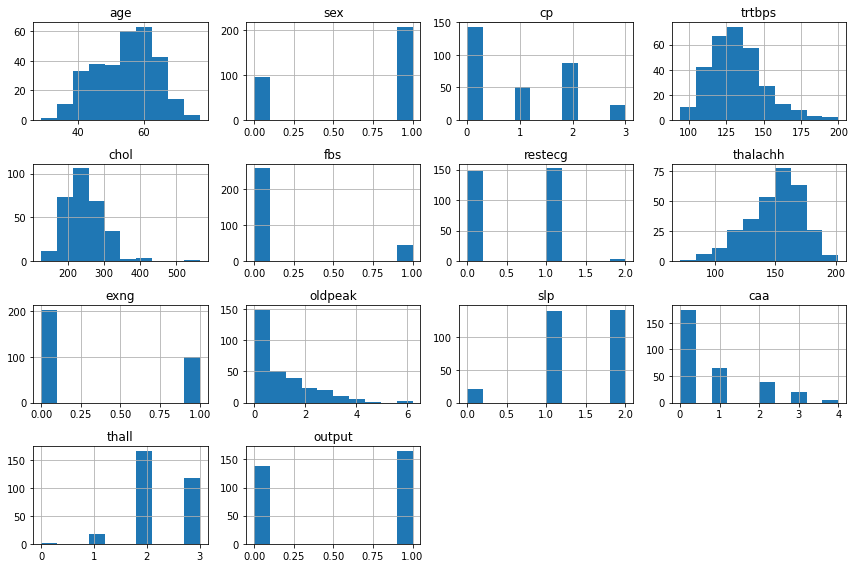

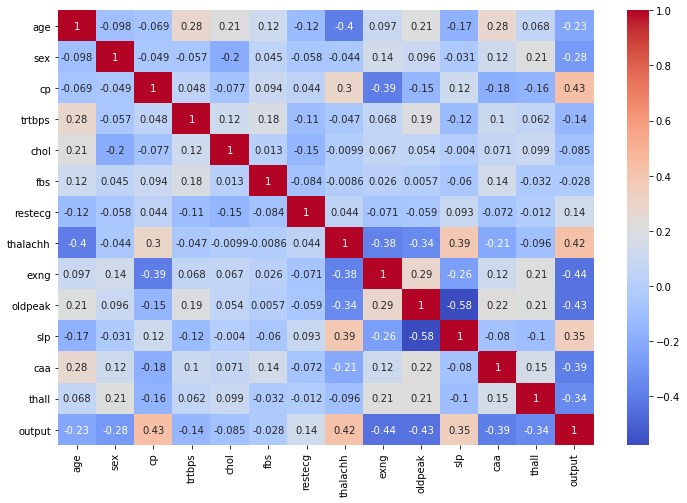

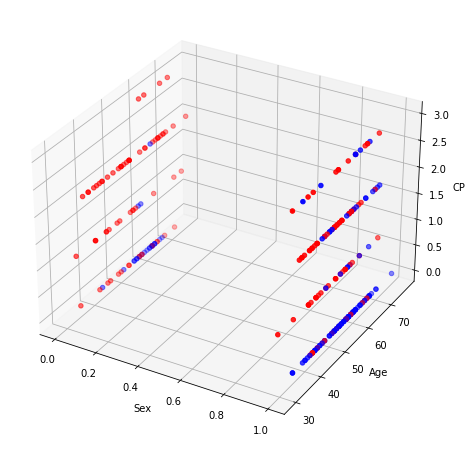

In [68]:
# Descriptive statistics
descr_stats= raw_df.describe()
print(descr_stats)

# Searching for missing values
print("Missing values in dataset:\n", raw_df.isnull().sum())
# no missing values in the dataset.

# Histogram for features in the dataset
raw_df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Correlation heatmap
corrmat = raw_df.corr()
top_corr = corrmat.index
plt.figure(figsize=(12,8))
heatmap = sns.heatmap(raw_df[top_corr].corr(),annot=True,cmap="coolwarm")

# 3D Scatterplot 
# For features age, sex and cp (chestpain type), colored by output.
# Sex = 0 indicates female, 
# Sex = 1 indicates male.
# Cp have values 0, 1, 2 or 3. 0 being typical angina, 3 being no symptoms. 
# Output = 0 means lesser chance of heartattack, colored blue.
# Output = 1 means higher chance for heart attack, colored red.

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
x = raw_df['sex']
y = raw_df['age']
z = raw_df['cp']
c = raw_df['output']  

# Defining colors of the dots
colors = np.where(c == 0, 'blue', 'red')

# Scatter plot with color based on 'output'
ax.scatter(x, y, z, c=colors)
ax.set_xlabel('Sex')
ax.set_ylabel('Age')
ax.set_zlabel('CP')
plt.show()



In [74]:
# Radial plot (must be changed from numpy operations to dataframe)

corr = scipy.stats.pearsonr(X[:,0], y)

all_corr = np.zeros(13)

for i in range(13):
    corr = scipy.stats.pearsonr(X[:,i], y)
    #print(f"feature: {i} - {corr[0]} ")
    all_corr[i] = float(corr[0])


min_corr = all_corr.min()
max_corr = all_corr.max()
norm_corr = (all_corr - min_corr) / (max_corr - min_corr)


# Creating plot:
labels = np.array(['Age', 'sex', 'Chest pain', 'Resting Blood Pressure', 'Chol', 'Fasting Blood Sugar', 'Rest ECG', 'Max Heart Rate', 'Exercise induces angina', 'Old Peak', 'slp', 'caa', "thall"])

# Number of variables/features
num_vars = len(labels)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "close the loop" by appending the start value to the end
values = norm_corr.tolist()
values += values[:1]
angles += angles[:1]

# Create the radar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

# Set the labels for each axis
ax.set_yticklabels([])  # Optionally hide the radial labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Title of the plot
plt.title('Feature Correlations Radar Plot', size=15, color='black', y=1.1)

# Show the plot
plt.show()


TypeError: '(slice(None, None, None), 0)' is an invalid key

In [ ]:
# PCA of scaled data to explore data and further reduce dimensionality

# Standardizing the raw data
X =(X - X.mean()) / X.std()

# Performing PCA and fitting on data
pca = PCA(n_components=13)
pca.fit(X)

loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(X.columns))],
index=X.columns)

# Plot of prinipal components and explained variance
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
ax1.grid(True)
ax1.plot(pca.explained_variance_ratio_, marker='o')
ax1.set_ylabel('Explained Variance')
ax1.set_xlabel('Principal Components')
ax1.grid(True)
ax1.set_title('Explained Variance in % by principal components')

# Singular values plot
ax2.grid(True)
ax2.set_title("Singular Values")
ax2.plot(pca.singular_values_, marker='o')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Singular Value')

# Cumulative plot
variance = np.cumsum(pca.explained_variance_ratio_)
ax3.grid(True)
ax3.plot(variance, marker='o')
ax3.set_ylabel('Cumulative Explained Variance')
ax3.set_xlabel('Principal Components')
ax3.grid(True)
ax3.set_title('Cumulative plot for explained variance')

plt.tight_layout()
plt.show()


### Data preprocessing

In [70]:

# Splitting the data into training and testing sets (70% train, 30% test):
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Now, X_train and y_train can be used to train the model
# X_test and y_test will be used for evaluating the model

#Additionally, ‘random_state=42’ is used to ensure reproducibility of the results,
#that is, 42 is an arbitrary number ensuring that the split is the same every time the split is performed.

### Modeling

### Classification model 1: Logistic regression


In [ ]:
# Data Preprocessing
def data_import(X_reduced):
    data = pd.read_csv("heart.csv")
    y = data.iloc[:, -1]

    # Return the reduced data and the target variable
    return X_reduced, y


# Assuming X_reduced is already computed from previous PCA steps
X_reduced, y = data_import(X)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

X_standardized = np.c_[np.ones(X_reduced.shape[0]), X_reduced]

X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2,
                                                    random_state=42)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict the test set results
y_pred = log_reg.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy1:.2f}")


# ___________________________________________________________________________

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def gradient(X, y, beta, lambda_):
    m = X.shape[0]
    predictions = sigmoid(X @ beta)
    error = predictions - y
    grad = (X.T @ error) / m + lambda_ * beta
    return grad


def hessian(X, beta, lambda_):
    m = X.shape[0]
    predictions = sigmoid(X @ beta)
    diag_elements = predictions * (1 - predictions)
    H = (X.T @ (diag_elements[:, np.newaxis] * X)) / m + lambda_ * np.eye(X.shape[1])
    return H


def newton_raphson(X, y, beta_initial, lambda_, tol=1e-6, max_iter=100):
    beta = beta_initial
    for _ in range(max_iter):
        grad = gradient(X, y, beta, lambda_)
        H = hessian(X, beta, lambda_)
        delta_beta = np.linalg.solve(H, grad)
        beta -= delta_beta

        if np.linalg.norm(delta_beta) < tol:
            break

    return beta


# Initialize beta coefficients
initial_beta = np.zeros(X_standardized.shape[1])

# Apply Newton-Raphson method
lambda_ = 1  # Regularization parameter
optimized_beta = newton_raphson(X_standardized, y, initial_beta, lambda_)


# Predict using optimized beta
def predict(X, beta):
    return sigmoid(X @ beta) >= 0.5


# Predict on test set
y_pred_optimized = predict(X_test, optimized_beta)

# Calculate accuracy
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Accuracy with Newton-Raphson optimization: {accuracy_optimized:.2f}")

# Print optimized beta coefficients
print("Optimized Beta Coefficients:")
print(optimized_beta)

# Initialize and train the Logistic Regression model with Elastic Net regularization
elastic_log_reg = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=1.0,
                                     max_iter=10000)
elastic_log_reg.fit(X_train, y_train)

# Predict the test set results
y_pred_elastic = elastic_log_reg.predict(X_test)
accuracy_elastic = accuracy_score(y_test, y_pred_elastic)
print(f"Accuracy with Elastic Net: {accuracy_elastic:.2f}")


### Classification model 2: kNN

In [ ]:

def data_import():
    data = pd.read_csv("heart.csv")
    t = data.iloc[:,-1] #last column of data, targets

    X_pre = data.drop(data.columns[-1], axis=1) #remove target column from the data

    #Center the data
    mean = np.mean(X_pre, axis=0)
    X_c = X_pre - mean

    #normalize the data
    min_X = X_c.min()
    max_X = X_c.max()
    X = (X_c - min_X) / (max_X - min_X)

    X_numpy = X.to_numpy()
    t_numpy = t.to_numpy()

    return X, t, X_numpy, t_numpy

_, _, X, t = data_import()


#kNN
def kNN(X, t, k):
    X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.5, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=k, p=1, metric='minkowski')
    knn.fit(X_train, t_train)
    t_pred = knn.predict(X_test)

    accuracy_test = knn.score(X_test, t_test)
    accuracy_train = knn.score(X_train, t_train)

    return t_pred, accuracy_test, accuracy_train

"""
Using principal components from PCA to kNN
"""

#Creating empty lists to store values for plotting
accuracies_test = list()
accuracies_train = list()
n_components = list()

#Create a for loop that that transforms X to principal components, splits the data
#and performs kNN 13 times with different number of principal components
for i in range(13):
    pca = PCA(n_components=i+1)
    pca.fit(X)

    X_pca = pca.transform(X)
    X_train, X_test, t_train, t_test = train_test_split(X_pca, t, test_size=0.5, random_state=42)

    knn = KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski')
    knn.fit(X_train, t_train)
    t_pred = knn.predict(X_test)

    acc_test = knn.score(X_test, t_test)
    acc_train = knn.score(X_train, t_train)

    accuracies_test.append(acc_test)
    accuracies_train.append(acc_train)

    n_components.append(i + 1)


"""
Now we need to check for different values of n_neighbours. I will be just using original data withou performing PCA on it.
"""

n_neighbours = list()
accs_test = list()
accs_train = list()
for i in range(20):
    _, acc_test, acc_train = kNN(X, t, i+1)
    n_neighbours.append(i+1)
    accs_test.append(acc_test)
    accs_train.append(acc_train)


max_acc_test_idx = accs_test.index(max(accs_test))
print(n_neighbours[max_acc_test_idx])
plt.plot(n_components[max_acc_test_idx], accs_test[max_acc_test_idx], 'ro', markersize=10,
         markeredgecolor='black', markerfacecolor='red', label=f"Max Test Accuracy: {max(accs_test):.2f}")

plt.plot(n_neighbours, accs_test, "o-", label="Test set")
plt.plot(n_neighbours, accs_train, "o-", label="Train set")
plt.grid(1)
plt.legend()
plt.xlabel("Number of neighbours")
plt.ylabel("Accuracy")
plt.show()


"""
Also include a grid search for test set size and k-values
"""
def grid_search_kNN(X, t, test_sizes, k_values):
    accuracy_results = np.zeros((len(test_sizes), len(k_values)))

    for i, test_size in enumerate(test_sizes):
        for j, k in enumerate(k_values):
            X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=test_size, random_state=42)
            knn = KNeighborsClassifier(n_neighbors=k, p=1, metric='minkowski')
            knn.fit(X_train, t_train)
            accuracy = knn.score(X_test, t_test)
            accuracy_results[i, j] = accuracy

    # Plotting the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(accuracy_results, annot=True, fmt=".2f", xticklabels=k_values, yticklabels=test_sizes, cmap='viridis')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Test Dataset Size')
    plt.title('Grid Search: Test Dataset Size vs k-Value')
    plt.show()

    # Identifying the best hyperparameter combination
    max_accuracy_idx = np.unravel_index(np.argmax(accuracy_results), accuracy_results.shape)
    best_test_size = test_sizes[max_accuracy_idx[0]]
    best_k = k_values[max_accuracy_idx[1]]
    best_accuracy = accuracy_results[max_accuracy_idx]

    print(f"Best Accuracy: {best_accuracy:.2f}")
    print(f"Best Test Size: {best_test_size}")
    print(f"Best k-Value: {best_k}")

    return best_test_size, best_k, best_accuracy

# Define the ranges for grid search
test_sizes = np.arange(0.1, 0.6, 0.05)  # Test sizes from 10% to 50% of the dataset
k_values = np.arange(1, 21)  # k-values from 1 to 20

# Perform the grid search
best_test_size, best_k, best_accuracy = grid_search_kNN(X, t, test_sizes, k_values)




### Classification model 3: Random Forest

In [ ]:
# Removing the least important features found by permuation (down below)
columns_to_remove = ['trtbps', 'thalachh', 'exng', 'chol']
# Removing the columns from the DataFrame X
X = X.drop(columns=columns_to_remove)

# Splitting the data into training and testing sets (80% train, 20% test):

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a random forest classifier object for grid search
forest = RandomForestClassifier(random_state=42)

# Grid search parameters
rf_params = {
    'n_estimators': [100, 300, 700],  # Number of trees
    'max_depth': [10, 20, 30],             # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],       # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum samples required at each leaf node
    'max_features': ['sqrt', 'log2']       # Number of features to consider at each split
}

# GridSearchCV to find the best hyperparameters
gs_random = GridSearchCV(estimator=forest, param_grid=rf_params, cv=5, n_jobs=-1, verbose=2)
gs_random.fit(X_train, y_train)

# Printing the best parameters and score
#print('Best Random Forest parameters:', gs_random.best_params_)
#print('Best score from grid search: {0:.2f}'.format(gs_random.best_score_))

# Fitting the Random Forest model with the best parameters
forest2 = RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42)
forest2.fit(X_train, y_train)

# Prediction
y_pred_RF = forest2.predict(X_test)

# Evaluate performance
train_accuracy = forest2.score(X_train, y_train)
test_accuracy = forest2.score(X_test, y_test)

print(f'Training data accuracy: {train_accuracy:.2f}')
print(f'Test data accuracy: {test_accuracy:.2f}')


# Permutation to find the least important features
perm_importance = permutation_importance(forest2, X_test, y_test, n_repeats=30, random_state=42)

feature_names = X.columns if hasattr(X, 'columns') else [f'Feature {i+1}' for i in range(X.shape[1])]

# Print the permutation importance scores
print("\nPermutation Feature Importances:")
for feature, importance in zip(feature_names, perm_importance.importances_mean):
    print(f'{feature}: {importance:.4f}')


# Confusion matrix
cm = confusion_matrix(y_test, y_pred_RF)

# Plottng
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



### Classification model 4: SVM

In [ ]:
# Based on the plot from data exploration, choosing  the number of PCs ( 6) as selecting the number of PCs that explain a significant amount of variance (80% to 90%) described commulative explained variance

n_components = 6
pca= PCA(n_components=n_components)
pca_reduced=pca.fit_transform(X)

#creating a dataframe with selected pc's
pcaDF=pd.DataFrame(data=pca_reduced, columns=[f'PC{i+1}' for i in range(n_components)])


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize the SVM model with an RBF kernel (you can choose other kernels like linear and poly but given data nature here we are using RBF)
svmModel = SVC(kernel='rbf', probability=True, random_state=42)

# Train the model on the training data
svmModel.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
#Evaluation after training has been done
# Make predictions on the test set
y_pred = svmModel.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


# Initializing the SVM model (using the same parameters as before)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Performing 5-fold cross-validation on the entire dataset
cv_scores = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy')

# Output the individual fold scores
print(f'Cross-Validation Scores: {cv_scores}')

# Output the mean accuracy and standard deviation
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')

# Grid search
# Defining the parameter grid
paramGrid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Initialize the SVM model
svm = SVC(probability=True)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=paramGrid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the GridSearch to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best accuracy score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}')

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on Test Set: {accuracy:.4f}')

# Print the classification report and confusion matrix
print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
